# **Basic EDA of Bharatcart ecomm**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner plots
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df = pd.read_csv("BharatCart_Ecommerce_Dataset.csv") 
df.head()

,date_,city_name,order_id,cart_id,dim_customer_key,procured_quantity,unit_selling_price,total_discount_amount,product_id,product_category,age,gender,income_bracket,delivery_time_days,stock_level,total_weighted_landing_price
0,03-06-2024,Delhi,3688914,200728,17523,6.0,818.69,109.04,574365,Books,29.0,Male,High,7,869.0,1103.55
1,24-11-2024,Chennai,7193565,582438,46933,1.0,454.24,198.32,464767,Books,19.0,Female,Low,9,29.0,4945.82
2,06-07-2023,Chennai,6632727,653726,23620,1.0,892.75,127.17,283512,Home,53.0,Other,High,7,843.0,3707.14
3,25-09-2024,Hyderabad,6534479,319653,23606,2.0,266.51,59.68,986004,Books,30.0,Other,High,2,328.0,4639.60
4,16-09-2023,Mumbai,9441721,494653,94029,6.0,475.97,26.19,199154,Home,42.0,Male,Low,8,39.0,4967.75


In [4]:
# Basic dataset info
df.info()

# Shape
print(f"\nShape of dataset: {df.shape}")

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60753 entries, 0 to 60752
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date_                         60753 non-null  object 
 1   city_name                     60753 non-null  object 
 2   order_id                      60753 non-null  int64  
 3   cart_id                       60753 non-null  int64  
 4   dim_customer_key              60753 non-null  int64  
 5   procured_quantity             60703 non-null  float64
 6   unit_selling_price            60703 non-null  float64
 7   total_discount_amount         60753 non-null  float64
 8   product_id                    60753 non-null  int64  
 9   product_category              60753 non-null  object 
 10  age                           60703 non-null  float64
 11  gender                        60703 non-null  object 
 12  income_bracket                60703 non-null  object 
 13  d

date_                            0
city_name                        0
order_id                         0
cart_id                          0
dim_customer_key                 0
procured_quantity               50
unit_selling_price              50
total_discount_amount            0
product_id                       0
product_category                 0
age                             50
gender                          50
income_bracket                  50
delivery_time_days               0
stock_level                     48
total_weighted_landing_price     0
dtype: int64

In [5]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("📊 Numerical Columns:")
print(numerical_cols)

print("\n🔤 Categorical Columns:")
print(categorical_cols)


📊 Numerical Columns:
['order_id', 'cart_id', 'dim_customer_key', 'procured_quantity', 'unit_selling_price', 'total_discount_amount', 'product_id', 'age', 'delivery_time_days', 'stock_level', 'total_weighted_landing_price']

🔤 Categorical Columns:
['date_', 'city_name', 'product_category', 'gender', 'income_bracket']


In [6]:
# Missing in numerical
print("Missing values in numerical columns:\n")
print(df[numerical_cols].isnull().sum())

# Missing in categorical
print("\nMissing values in categorical columns:\n")
print(df[categorical_cols].isnull().sum())


Missing values in numerical columns:

order_id                         0
cart_id                          0
dim_customer_key                 0
procured_quantity               50
unit_selling_price              50
total_discount_amount            0
product_id                       0
age                             50
delivery_time_days               0
stock_level                     48
total_weighted_landing_price     0
dtype: int64

Missing values in categorical columns:

date_                0
city_name            0
product_category     0
gender              50
income_bracket      50
dtype: int64


In [7]:
# Fill numerical columns with median 
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode 
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])


In [8]:
# Calculate skewness
skewness = df[numerical_cols].skew().sort_values(ascending=False)

# Show skewness
print("📉 Skewness of Numerical Features:\n", skewness)

# Highlight highly skewed features
print("\n⚠️ Highly Skewed Columns (|skew| > 1):")
print(skewness[abs(skewness) > 1])


📉 Skewness of Numerical Features:
 order_id                        0.014662
cart_id                         0.003516
total_discount_amount           0.002603
procured_quantity               0.001934
unit_selling_price             -0.001333
product_id                     -0.002594
stock_level                    -0.005533
total_weighted_landing_price   -0.006341
delivery_time_days             -0.006607
dim_customer_key               -0.008126
age                            -0.009667
dtype: float64

⚠️ Highly Skewed Columns (|skew| > 1):
Series([], dtype: float64)


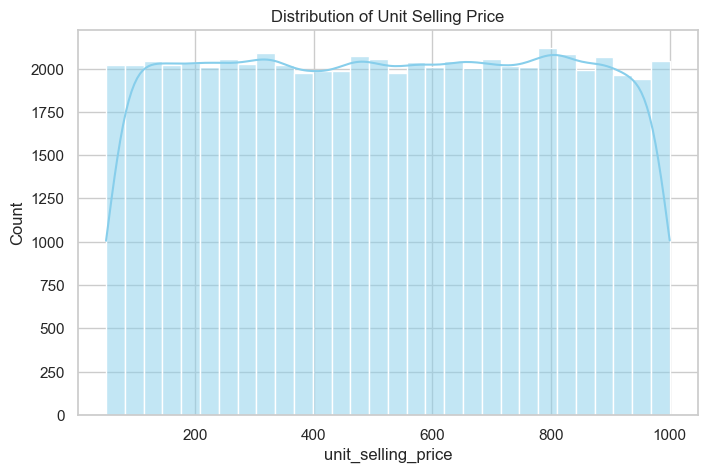

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['unit_selling_price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Unit Selling Price')
plt.show()


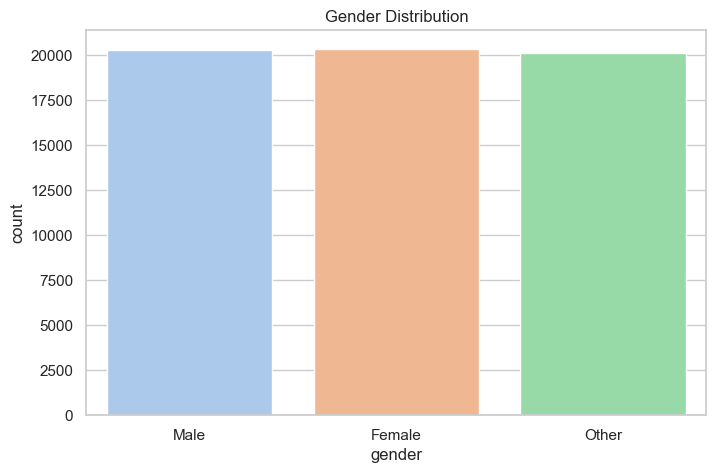

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.show()


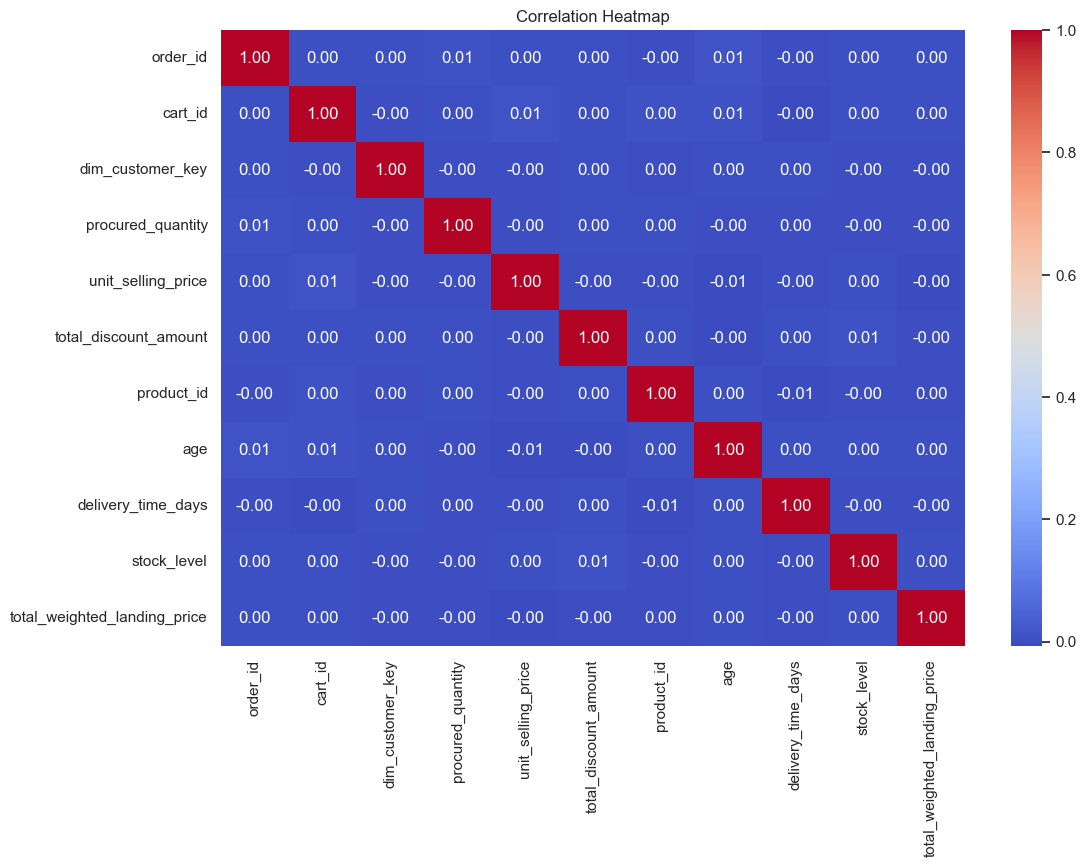

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


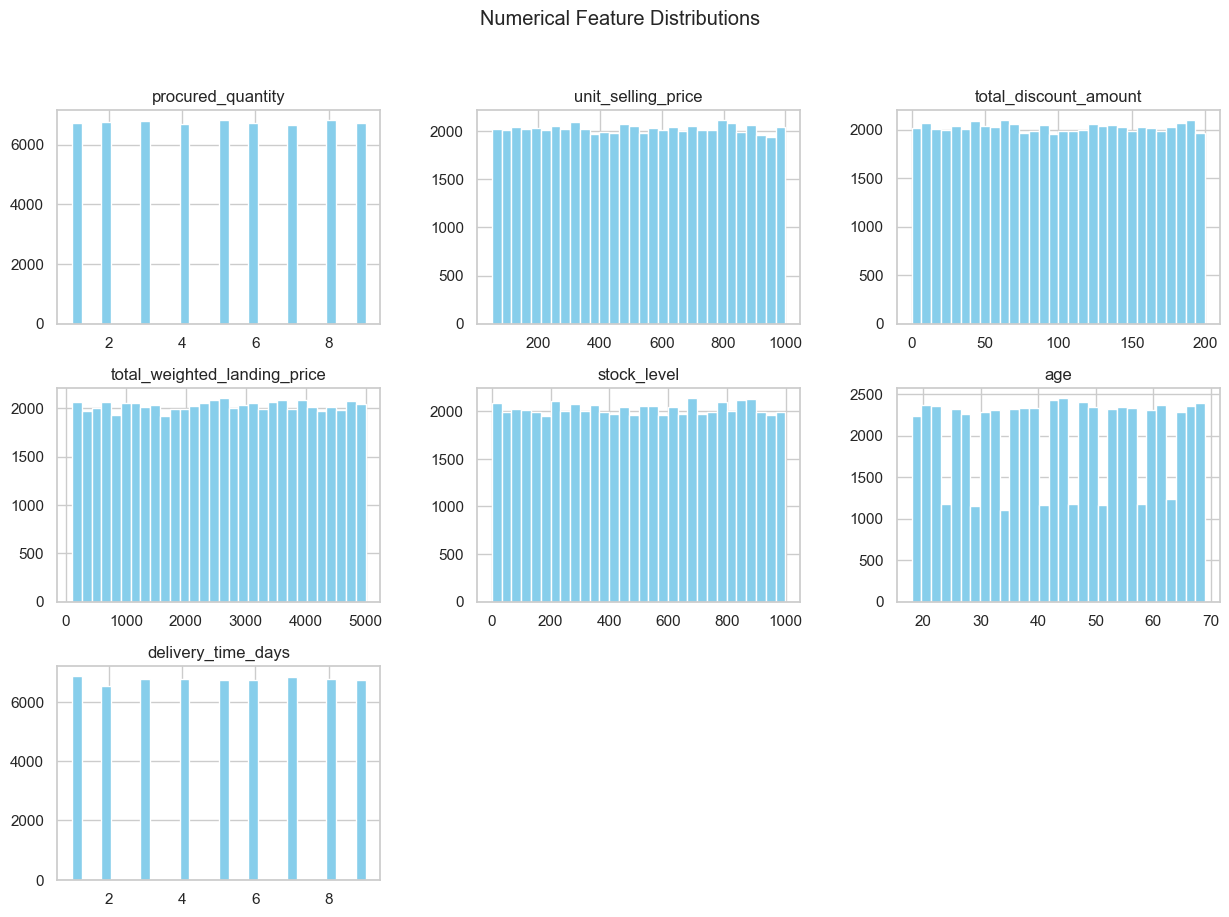

In [12]:
#Univariate Analysis (Numerical Features)
num_cols = ['procured_quantity', 'unit_selling_price', 'total_discount_amount',
            'total_weighted_landing_price', 'stock_level', 'age', 'delivery_time_days']

df[num_cols].hist(bins=30, figsize=(15,10), layout=(3,3), color='skyblue')
plt.suptitle('Numerical Feature Distributions')
plt.show()

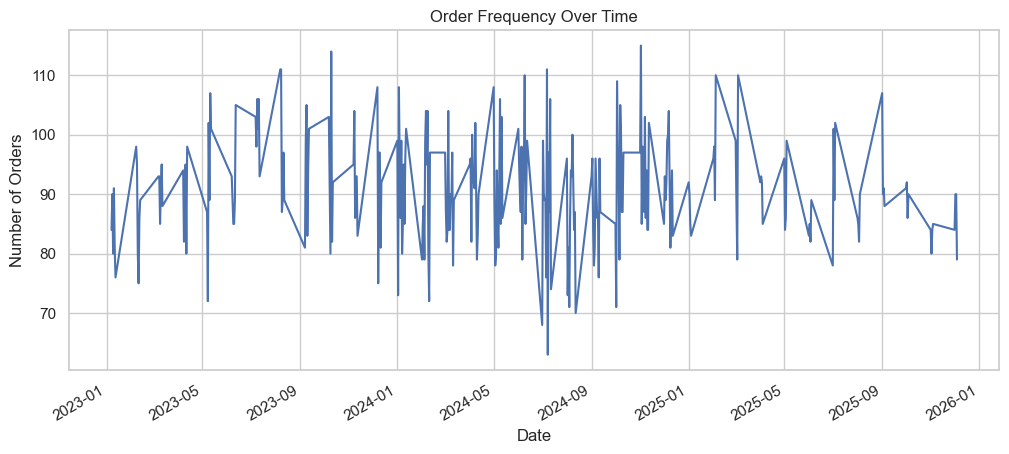

In [13]:
#  Time-Based Analysis (if 'date_' column exists)
df['date_'] = pd.to_datetime(df['date_'], errors='coerce')

# Orders over time
df['date_'].value_counts().sort_index().plot(figsize=(12,5), title="Order Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()

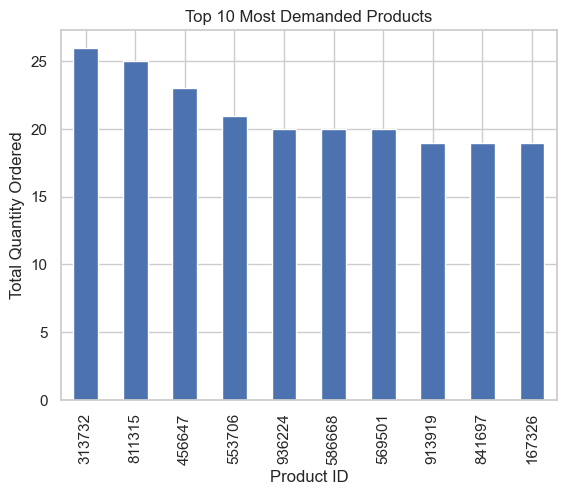

In [14]:
#  Top Products by Sales
top_products = df.groupby('product_id')['procured_quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Most Demanded Products')
plt.ylabel("Total Quantity Ordered")
plt.xlabel("Product ID")
plt.show()

In [15]:
copy_df = df.copy()
copy_df.head()  # Show the first few rows

,date_,city_name,order_id,cart_id,dim_customer_key,procured_quantity,unit_selling_price,total_discount_amount,product_id,product_category,age,gender,income_bracket,delivery_time_days,stock_level,total_weighted_landing_price
0,2024-03-06,Delhi,3688914,200728,17523,6.0,818.69,109.04,574365,Books,29.0,Male,High,7,869.0,1103.55
1,NaT,Chennai,7193565,582438,46933,1.0,454.24,198.32,464767,Books,19.0,Female,Low,9,29.0,4945.82
2,2023-06-07,Chennai,6632727,653726,23620,1.0,892.75,127.17,283512,Home,53.0,Other,High,7,843.0,3707.14
3,NaT,Hyderabad,6534479,319653,23606,2.0,266.51,59.68,986004,Books,30.0,Other,High,2,328.0,4639.60
4,NaT,Mumbai,9441721,494653,94029,6.0,475.97,26.19,199154,Home,42.0,Male,Low,8,39.0,4967.75


In [16]:
print("Remaining missing values in each column:")
print(copy_df.isnull().sum())

Remaining missing values in each column:
date_                           36813
city_name                           0
order_id                            0
cart_id                             0
dim_customer_key                    0
procured_quantity                   0
unit_selling_price                  0
total_discount_amount               0
product_id                          0
product_category                    0
age                                 0
gender                              0
income_bracket                      0
delivery_time_days                  0
stock_level                         0
total_weighted_landing_price        0
dtype: int64


# 📊 **Retention Rate Analysis**


In [17]:
# Convert the 'date_' column to datetime
df['date_'] = pd.to_datetime(df['date_'])

# Create new columns for cohort analysis
df['OrderMonth'] = df['date_'].dt.to_period('M').astype(str)
df['CohortMonth'] = df.groupby('dim_customer_key')['date_'].transform('min').dt.to_period('M').astype(str)

In [18]:
# Ensure these are datetime (safety step)
df['OrderMonth'] = pd.to_datetime(df['OrderMonth'])
df['CohortMonth'] = pd.to_datetime(df['CohortMonth'])

# Create CohortIndex
df['CohortIndex'] = (
    (df['OrderMonth'].dt.year - df['CohortMonth'].dt.year) * 12 +
    (df['OrderMonth'].dt.month - df['CohortMonth'].dt.month) + 1
)


In [19]:
print(df[['dim_customer_key', 'CohortMonth', 'OrderMonth', 'CohortIndex']].head())

   dim_customer_key CohortMonth OrderMonth  CohortIndex
0             17523  2024-03-01 2024-03-01          1.0
1             46933         NaT        NaT          NaN
2             23620  2023-06-01 2023-06-01          1.0
3             23606         NaT        NaT          NaN
4             94029  2025-11-01        NaT          NaN


In [20]:
# 1. Count unique customers in each cohort per month
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['dim_customer_key'].nunique().reset_index()

# 2. Pivot for cohort table
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='dim_customer_key')

# 3. Calculate retention by dividing each row by its cohort size
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

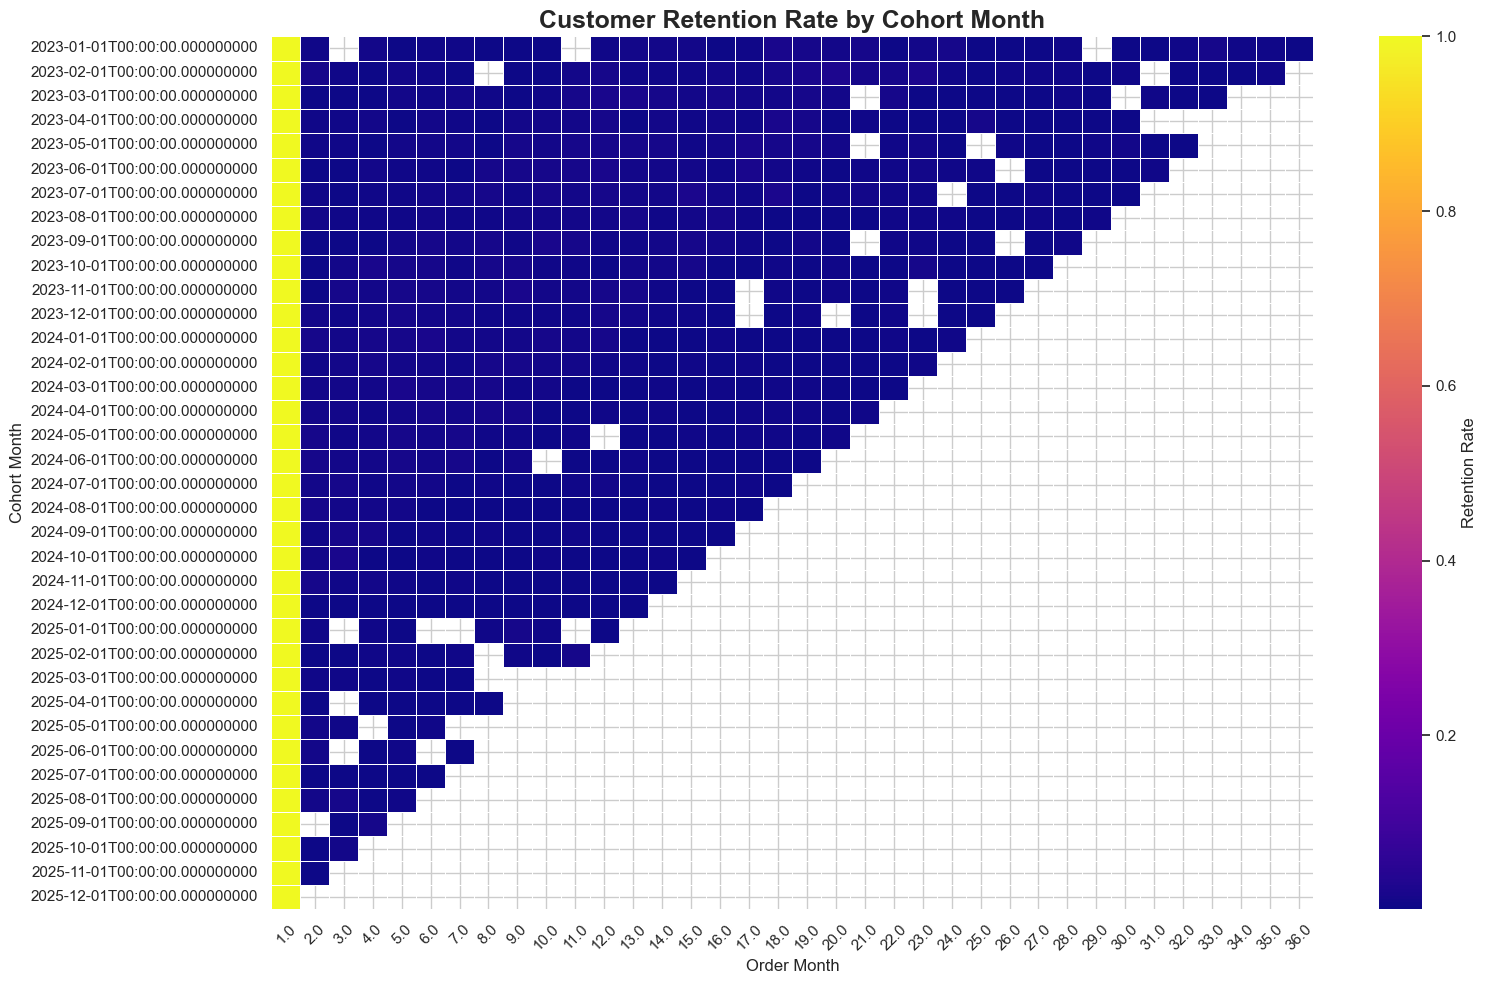

In [21]:
plt.figure(figsize=(16, 10))
sns.heatmap(retention,
            cmap="plasma",      # << Flashy gradient
            linecolor='white',
            linewidths=0.5,
            cbar_kws={'label': 'Retention Rate'},
            annot=False)

plt.title('Customer Retention Rate by Cohort Month', fontsize=18, fontweight='bold')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Cohort Month', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Inventory Gap Analysis**

In [22]:
inventory_df = df[['product_id', 'product_category', 'procured_quantity', 'stock_level', 'unit_selling_price', 'order_id']].copy()

In [23]:
product_stats = inventory_df.groupby(['product_id', 'product_category']).agg({
    'order_id': 'nunique',        # Demand proxy
    'procured_quantity': 'sum',
    'stock_level': 'mean'
}).reset_index()

product_stats.rename(columns={
    'order_id': 'num_orders',
    'procured_quantity': 'total_procured',
    'stock_level': 'avg_stock'
}, inplace=True)

product_stats['gap'] = product_stats['num_orders'] - product_stats['avg_stock']


In [24]:
# Top inventory gap products
inventory_gap = product_stats.sort_values(by='gap', ascending=False).head(15)
inventory_gap


,product_id,product_category,num_orders,total_procured,avg_stock,gap
38354,671518,Clothing,1,4.0,0.0,1.0
2761,140250,Home,1,3.0,0.0,1.0
17189,356247,Clothing,1,8.0,0.0,1.0
5998,187534,Electronics,1,2.0,0.0,1.0
12753,288817,Home,1,9.0,0.0,1.0
16517,346199,Books,1,7.0,0.0,1.0
759,111192,Grocery,1,6.0,0.0,1.0
55703,931305,Home,1,2.0,0.0,1.0
2872,142211,Clothing,1,6.0,0.0,1.0
34517,614235,Electronics,1,3.0,0.0,1.0


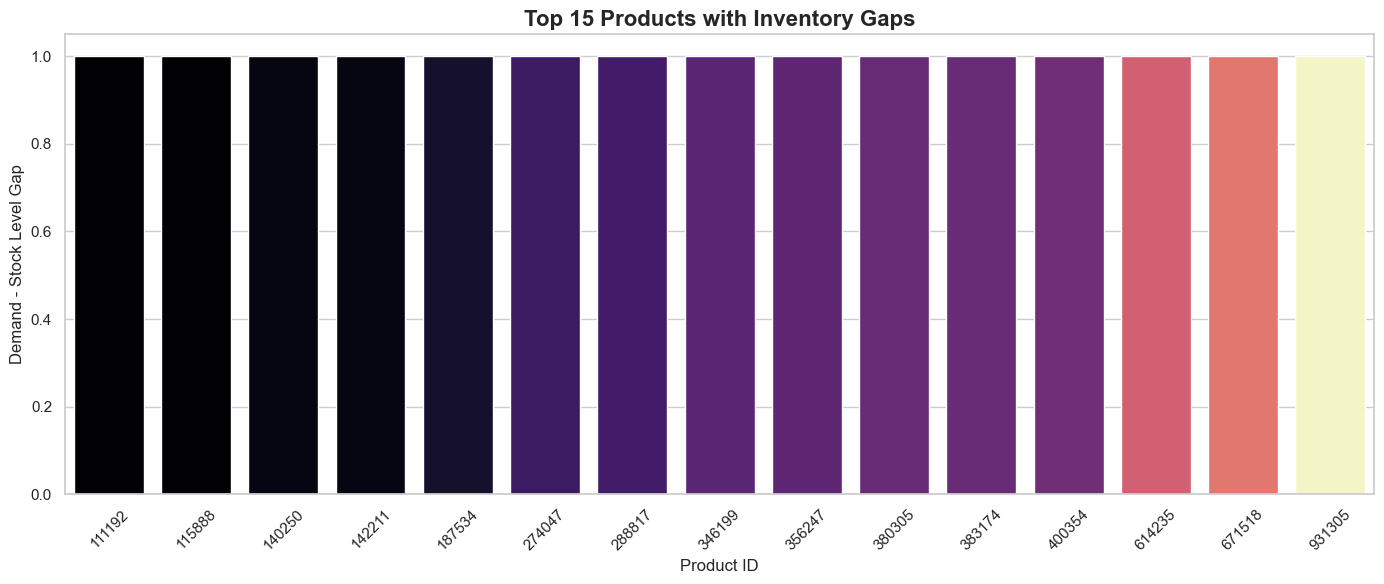

In [25]:
plt.figure(figsize=(14, 6))
sns.barplot(x='product_id', y='gap', data=inventory_gap, hue='product_id', palette='magma', dodge=False, legend=False)
plt.title('Top 15 Products with Inventory Gaps', fontsize=16, fontweight='bold')
plt.xlabel('Product ID')
plt.ylabel('Demand - Stock Level Gap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Customer Segmentation using KMeans Clustering**

In [26]:
# Convert date column to datetime
df['date_'] = pd.to_datetime(df['date_'])

# Latest date for reference
snapshot_date = df['date_'].max()

# RFM table
rfm = df.groupby('dim_customer_key').agg({
    'date_': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'unit_selling_price': 'sum'
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,10001,670.0,1,88.47
1,10003,NaN,2,930.51
2,10004,NaN,1,404.42
3,10005,NaN,2,892.35
4,10006,NaN,1,530.33


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


In [28]:
snapshot_date = df['date_'].max()

rfm = df.groupby('dim_customer_key').agg({
    'date_': lambda x: (snapshot_date - x.max()).days,   # Recency
    'order_id': 'nunique',                               # Frequency
    'unit_selling_price': 'sum'                          # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [29]:
# Check for nulls
print(rfm.isnull().sum())

# Fill with medians if needed
rfm['Recency'].fillna(rfm['Recency'].median(), inplace=True)
rfm['Frequency'].fillna(rfm['Frequency'].median(), inplace=True)
rfm['Monetary'].fillna(rfm['Monetary'].median(), inplace=True)


CustomerID        0
Recency       23224
Frequency         0
Monetary          0
dtype: int64


In [30]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


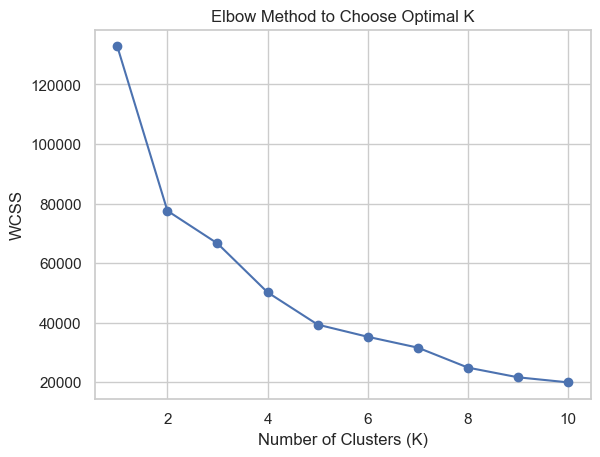

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Choose Optimal K')
plt.grid(True)
plt.show()


In [32]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


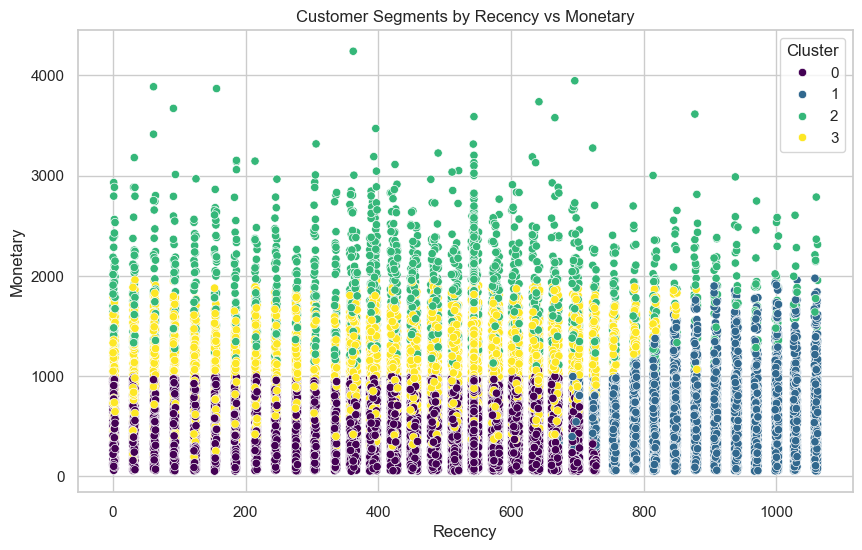

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title("Customer Segments by Recency vs Monetary")
plt.show()


In [34]:
rfm.groupby('Cluster').mean().style.background_gradient(cmap='Blues')


,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,55086.725789,511.573657,1.007118,520.313350
1,54992.899853,893.401848,1.279236,655.877676
2,54981.302571,493.389381,3.190476,1811.336098
3,55195.006016,478.928456,2.037598,1072.065132


In [35]:
from sklearn.cluster import KMeans
from joblib import dump
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'rfm' dataframe is already prepared
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Save model and scaler
dump(kmeans, 'kmeans_model.pkl')
dump(scaler, 'scaler_rfm.pkl')


['scaler_rfm.pkl']

In [36]:
from joblib import dump

# Save your processed dataframe
dump(copy_df, 'customer_data_df.joblib')


['customer_data_df.joblib']

In [37]:
# Define age bins and labels
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '>60']

# Create age_group column
copy_df['age_group'] = pd.cut(copy_df['age'], bins=bins, labels=labels, right=False)


In [39]:
# Calculate total_spent if not already done
copy_df['total_spent'] = copy_df['procured_quantity'] * copy_df['unit_selling_price']
